In [1]:
# %%
# Carga de datos
import pandas as pd  #  type: ignore

pd.set_option("display.notebook_repr_html", False)

flights = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/flights.csv",
    sep=",",
    thousands=None,
    decimal=".",
)

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               99999 non-null  int64  
 1   Month              99999 non-null  int64  
 2   DayofMonth         99999 non-null  int64  
 3   DayOfWeek          99999 non-null  int64  
 4   DepTime            98857 non-null  float64
 5   CRSDepTime         99999 non-null  int64  
 6   ArrTime            98697 non-null  float64
 7   CRSArrTime         99999 non-null  int64  
 8   UniqueCarrier      99999 non-null  object 
 9   FlightNum          99999 non-null  int64  
 10  TailNum            98857 non-null  object 
 11  ActualElapsedTime  98697 non-null  float64
 12  CRSElapsedTime     99999 non-null  int64  
 13  AirTime            98697 non-null  float64
 14  ArrDelay           98697 non-null  float64
 15  DepDelay           98857 non-null  float64
 16  Origin             999

Porcentaje de vuelos retrasados: 19.59%
Porcentaje de vuelos retrasados: 19.81 %


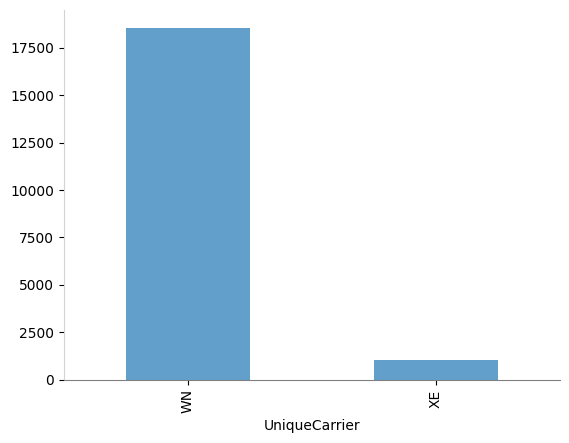

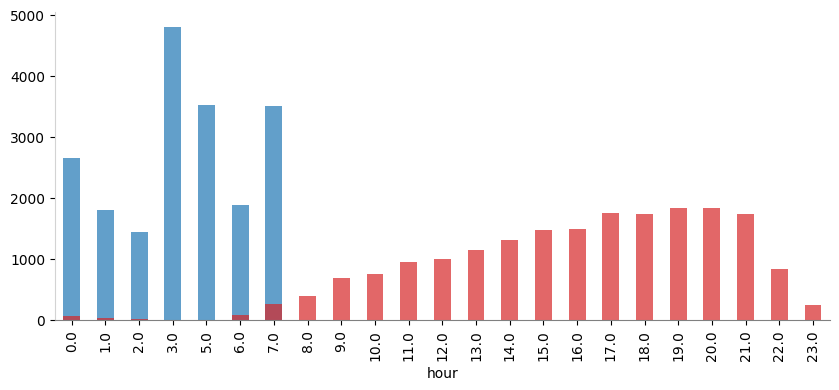

In [2]:

# %%
# Estadísticos de las columnas numéricas
flights.describe()


# %%
# Cómputo del total de registros de la tabla
numTotalFlights = len(flights)
numTotalFlights

# %%
# Filtrado de registros para vuelos retrasados
# Un vuelo con un retraso mayor a 15 minutos se considera retrasado
# (columna DepDelay).
delayedFlights = flights[flights["DepDelay"] > 15][["UniqueCarrier", "DepDelay"]]
delayedFlights.head(5)


# %%
# Cálculo del porcentaje de vuelos retrasados
numDelayedFlights = len(delayedFlights)
print(
    "Porcentaje de vuelos retrasados: "
    + str(round(numDelayedFlights / numTotalFlights * 100, 2))
    + "%"
)


# %%
# Copia de una tabla y copia de columnas
flightsWithDelays = flights[
    [
        "Year",
        "Month",
        "DayofMonth",
        "UniqueCarrier",
        "FlightNum",
        "DepDelay",
    ]
].copy()

flightsWithDelays["IsDelayed"] = flightsWithDelays["DepDelay"].copy()

# %%
# Conteo de registros nulos en una columna
flightsWithDelays.IsDelayed.isna().sum()


# %%
# Aplicación de una función a una columna
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 0 if pd.isna(x) else x
)
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 1 if x > 15 else 0
)

flightsWithDelays[["DepDelay", "IsDelayed"]].head(10)


# %%
# Cálculo del porcentaje de vuelos retrasados
print(
    "Porcentaje de vuelos retrasados: {:4.2f} %".format(
        100 * flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()
    )
)

# %%
# Cantidad de vuelos retrasados por transportador
import os
import matplotlib.pyplot as plt  #  type: ignore

if not os.path.exists("../files/images"):
    os.makedirs("../files/images")

flights["IsDelayed"] = flights["DepDelay"].copy()
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: 0 if pd.isna(x) else x)
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: int(x > 15))
(flights.groupby("UniqueCarrier").sum())["IsDelayed"].plot.bar(
    color="tab:blue",
    alpha=0.7,
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "../files/images/delays_by_carrier.png",
)
plt.show()


# %%
# Retrasos por día de la semana
(flights.groupby("DayOfWeek").sum())["IsDelayed"].plot.bar(
    color="tab:blue",
    alpha=0.7,
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "../files/images/delays_by_day_of_week.png",
)


# %%
# Retrasos por hora del día

flights["hour"] = flights["DepTime"].copy()

flights["hour"] = flights["hour"].map(lambda x: int(x / 100) if not pd.isna(x) else x)

(flights.groupby("hour").sum())["IsDelayed"].plot.bar(
    color="tab:red",
    alpha=0.7,
    figsize=(10, 4),
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "../files/images/delays_by_hour_of_day.png",
)
plt.show()





